In [1]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def f1(v):
    return 1.57 + 24.3*v

X1 = np.linspace(-2, 2, 1000)
y1 = f1(X1)

def f2(v, y, w):
    return 0.23 + 14.2*(v+y)/(3*w)

v2 = np.linspace(-2, 2, 1000)
y2 = np.linspace(-2, 2, 1000)
w2 = np.linspace(-2, 2, 1000)
y2 = f2(v2, y2, w2)

def f11(x):
    return 6.87 + 11*np.cos(7.23*x**3)

X11 = np.linspace(-2, 2, 1000)
y11 = f11(X11)

def f7(x):
    return 213.809408*(1 - np.exp(-0.547237*x))

X7 = np.linspace(-2, 2, 1000)
y7 = f7(X7)

In [3]:
n_runs = 3
n_generations = 10
pop_size = 40
random_const_range = (0, 15)
SEED = 42

In [4]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "exp-": lambda a: np.exp(-a)}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"],
                         "exp-": ["np.exp(-", ")"]}
weigths_op = {"exp-": 4}

# F1

In [5]:
optimization_kind = "LS"
func = f1
x_range = [-2,2]
n_points = 1000
population = 40
generations = 10
const_range = (0,15)
dir_path = "Outputs/article_tests_new/LS"

In [6]:
optimization_opts = ["PSO", "LS", "random_LS", "differential_evolution", "dual_annealing"]
# optimization_opts = ["random_LS", "differential_evolution", "dual_annealing"]
main_path = "Outputs/article_tests_new/"
paths = [main_path + i for i in optimization_opts]
paths

['Outputs/article_tests_new/PSO',
 'Outputs/article_tests_new/LS',
 'Outputs/article_tests_new/random_LS',
 'Outputs/article_tests_new/differential_evolution',
 'Outputs/article_tests_new/dual_annealing']

In [7]:
def create_dirs(path):
    if not os.path.exists(path+"/data"):
        os.makedirs(path+"/data")
    if not os.path.exists(path+"/trees"):
        os.makedirs(path+"/trees")

for path in paths:
    create_dirs(path)

In [8]:
for optimization_kind in optimization_opts:
    dir_path = main_path + optimization_kind
    X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          normalize=False, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op, weights=weigths_op,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict,
                                          SEED=SEED)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests_new/PSO =-=-=-=-=-=-=-=-
iniciou


KeyboardInterrupt: 

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = smp.symbols("x")
SR = SymbolicRegression(10, functions=functions_op, operators=operators_op, custom_functions_dict=custom_functions_dict)
SR.fit(np.c_[X1],y1, feature_names=["x"])

20.5053094775427*x

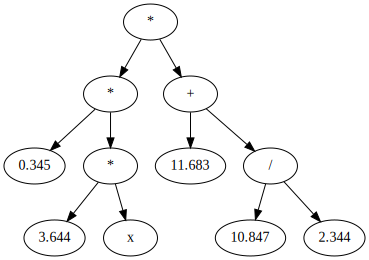

21.702905788974036

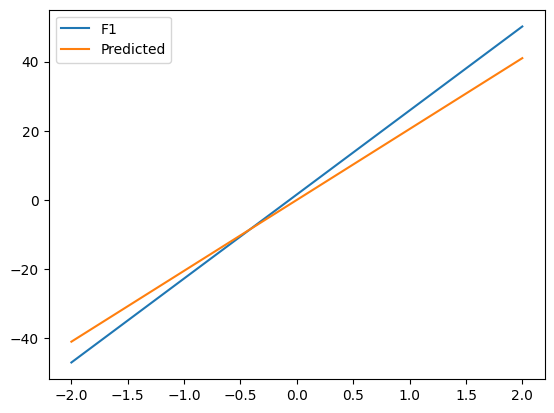

In [9]:
with open("Outputs/article_tests_new/LS/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)
    smp_expr = tree.toSmpExpr(SR._operators, SR._functions, SR.custom_functions_dict)
    display(smp_expr)
    
display(tree.visualize_tree())
display(SR.fitness_score(tree))

# ======================
smp_func, _ = tree.toFunc(SR._operators, SR._functions, SR.custom_functions_dict)


# smp_expr = smp_expr.subs(x, (x - X1.min())/(X1.max() - X1.min()))
# smp_expr = smp_expr.subs(x, (X1.max() - X1.min())*x + X1.min() )
# smp_expr = (y1.max() - y1.min())*smp_expr + y1.min()
# smp_expr = (y1_max - y1_min)*smp_expr + y1_min
# smp_expr = (smp_expr - y1.min())/(y1.max() - y1.min())
# display(smp_expr)

smp_func = SR.toFunc(tree)

X = np.linspace(-2, 2, 1000)
y = smp_func(X)

plt.plot(X1, y1, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()
# plt.plot(scaler.fit_transform(np.c_[X1]), scaler.fit_transform(np.c_[y1]), label="F1")
# plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]), label="predicted")
# plt.legend()


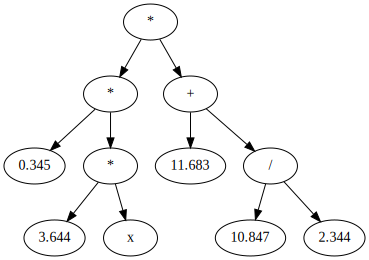

In [50]:
AEG = SR._convert_to_AEG(tree)
display(AEG.sexp.visualize_tree())
SR.optimization_kind = "differential_evolution"

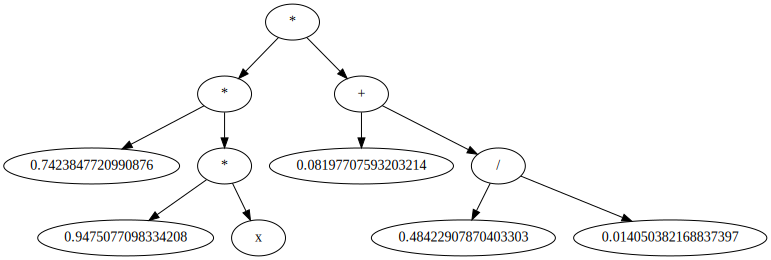

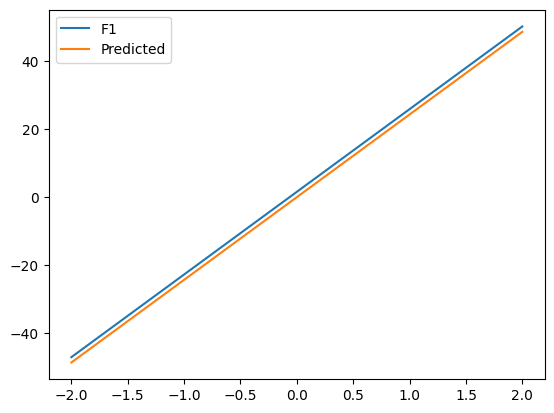

2.4649000000196555

In [59]:
new_AEG, _ = SR.optimizeConstants(AEG, 0, 0)
display(new_AEG.sexp.visualize_tree())

func = SR.toFunc(new_AEG.sexp)

X = np.linspace(-2, 2, 1000)
y = func(X)

plt.plot(X1, y1, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()

np.mean((y1-y)**2)

[ 0.3558635   4.05401635 11.15245663  9.37148843  1.6466546 ]


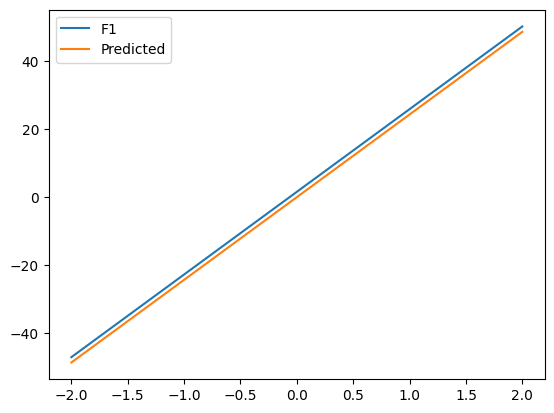

2.4649000001854544

In [56]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d, e):
    return a*b*x*(c+d/e)

params, _ = curve_fit(SR.toFunc(AEG), X1, y1, [0.345, 3.644, 11.683, 10.874, 2.344])
print(params)

X = np.linspace(-2, 2, 1000)
y = func(X, *params)

plt.plot(X1, y1, label="F1")
plt.plot(X, y, label="Predicted")
plt.legend()
plt.show()

np.mean((y1-y)**2)

# F7

In [ ]:
optimization_kind = "LS"
func = f7
x_range = [-2,2]
n_points = 1000
population = 4000
generations = 10
const_range = (0,15)
dir_path = "Outputs/article_tests_new/F7"

In [ ]:
optimization_opts = ["PSO", "LS", "random_LS", "differential_evolution", "dual_annealing"]
main_path = "Outputs/article_tests_new/F7/"
paths = [main_path + i for i in optimization_opts]
paths

['Outputs/article_tests/F7/PSO',
 'Outputs/article_tests/F7/LS',
 'Outputs/article_tests/F7/random_LS',
 'Outputs/article_tests/F7/differential_evolution',
 'Outputs/article_tests/F7/dual_annealing']

In [ ]:
def create_dirs(path):
    if not os.path.exists(path+"/data"):
        os.makedirs(path+"/data")
    if not os.path.exists(path+"/trees"):
        os.makedirs(path+"/trees")

for path in paths:
    create_dirs(path)

In [ ]:
for optimization_kind in optimization_opts:
    dir_path = main_path + optimization_kind
    X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict,
                                          SEED=SEED)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F7/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F7/LS =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
inicio

# F11

In [ ]:
optimization_kind = "LS"
func = f11
x_range = [-2,2]
n_points = 1000
population = 4000
generations = 10
const_range = (0,15)
dir_path = "Outputs/article_tests_new/F11"

In [ ]:
optimization_opts = ["PSO", "LS", "random_LS", "differential_evolution", "dual_annealing"]
main_path = "Outputs/article_tests_new/F11/"
paths = [main_path + i for i in optimization_opts]
paths

['Outputs/article_tests/F11/PSO',
 'Outputs/article_tests/F11/LS',
 'Outputs/article_tests/F11/random_LS',
 'Outputs/article_tests/F11/differential_evolution',
 'Outputs/article_tests/F11/dual_annealing']

In [ ]:
def create_dirs(path):
    if not os.path.exists(path+"/data"):
        os.makedirs(path+"/data")
    if not os.path.exists(path+"/trees"):
        os.makedirs(path+"/trees")

for path in paths:
    create_dirs(path)

In [ ]:
for optimization_kind in optimization_opts:
    dir_path = main_path + optimization_kind
    X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict,
                                          SEED=SEED)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - article_tests/F11/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - article_tests/F11/LS =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou

# F2

In [ ]:
n_runs = 3
n_generations = 10
pop_size = 40
random_const_range = (0, 15)

In [ ]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b),
                "/": lambda a,b: np.divide(a,b), "-": lambda a,b: np.subtract(a,b)}
functions_op = {"sin": lambda a: np.sin(a), "cos": lambda a: np.cos(a),
                "square": lambda a: a**2, "cube": lambda a: a**3}
custom_functions_dict = {"cube": ["(", ")**3"], "square": ["(", ")**2"]}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [52]:
def f2(v, y, w):
    return 0.23 + 14.2*(v+y)/(3*w)

v2 = np.linspace(-2, 2, 1000)
v2 = scaler.fit_transform(np.c_[v2])
y2 = np.linspace(-2, 2, 1000)
y2 = scaler.fit_transform(np.c_[y2])
w2 = np.linspace(-2, 2, 1000)
w2 = scaler.fit_transform(np.c_[w2])
Y2 = f2(v2, y2, w2)
Y2 = scaler.fit_transform(np.c_[Y2]).reshape(-1)
Y2[0] = 0.0

In [53]:
optimization_kind = "LS"
# func = f11
x_range = [-1,1]
n_points = 1000
population = 40
generations = 10
const_range = (0,15)
n_runs = 3
dir_path = "Outputs/article_tests_new/F2"

In [54]:
optimization_opts = ["PSO", "LS", "random_LS", "differential_evolution", "dual_annealing"]
main_path = "Outputs/article_tests_new/F2/"
paths = [main_path + i for i in optimization_opts]
paths

['Outputs/article_tests/F2/PSO',
 'Outputs/article_tests/F2/LS',
 'Outputs/article_tests/F2/random_LS',
 'Outputs/article_tests/F2/differential_evolution',
 'Outputs/article_tests/F2/dual_annealing']

In [55]:
def create_dirs(path):
    if not os.path.exists(path+"/data"):
        os.makedirs(path+"/data")
    if not os.path.exists(path+"/trees"):
        os.makedirs(path+"/trees")

for path in paths:
    create_dirs(path)

In [56]:
for optimization_kind in optimization_opts:
    dir_path = main_path + optimization_kind
    for i in range(n_runs):
            print(f"-=-=-=-=-=-=-=-= Training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-=-")
            SR = SymbolicRegression(generations, max_population_size=population,
                                    max_island_count=int(population/10), random_const_range=const_range,
                                    operators=operators_op, functions=functions_op,
                                    optimization_kind=optimization_kind,
                                    custom_functions_dict=custom_functions_dict)
            SR.fit(np.c_[v2, y2, w2], Y2, feature_names=["v", "w", "y"])    
            
            start_time = time()
            output_AEG = SR.predict()
            end_time = time()
            data = SR.evaluate_tree(output_AEG.sexp)
            
            print(f"-=-=-=-=-=-=-= Done training for population {population} and generation {generations} - {dir_path[dir_path.find('/')+1:]} =-=-=-=-=-=-=-")

            # Writing the data =================================

            # In case the output is a constant function
            if data.shape[0] == 1:
                data = np.array([data[0] for i in range(0, 1000)])

            # data = pd.DataFrame(np.c_[X, data], columns=["x", "y"])
            # data.to_csv(dir_path + f"/data/data-{population}.csv", sep=",", index=False)

            # graph = output_AEG.sexp.visualize_tree()
            # graph.render(dir_path + f"/trees/tree-{population}", format="svg")

            with open(dir_path + f"/trees/tree-{population}-{generations}-{i}", "wb") as file:
                pickle.dump(output_AEG.sexp, file)

            with open(dir_path + "/results.csv", "a") as file:
                file.write(f"{SR.fitness_score(output_AEG)},{population},{generations},{end_time - start_time},{i}\n")

-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 40 and generation 10 - article_tests/F2/PSO =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 40 and generation 10 - article_tests/F2/LS =-=-=-=-=-=-=-=-
iniciou
iniciou


TypeError: _lambdifygenerated() missing 2 required positional arguments: 'y' and 'c0'

[       nan 0.002002   0.004004   0.00600601 0.00800801 0.01001001
 0.01201201 0.01401401 0.01601602 0.01801802 0.02002002 0.02202202
 0.02402402 0.02602603 0.02802803 0.03003003 0.03203203 0.03403403
 0.03603604 0.03803804 0.04004004 0.04204204 0.04404404 0.04604605
 0.04804805 0.05005005 0.05205205 0.05405405 0.05605606 0.05805806
 0.06006006 0.06206206 0.06406406 0.06606607 0.06806807 0.07007007
 0.07207207 0.07407407 0.07607608 0.07807808 0.08008008 0.08208208
 0.08408408 0.08608609 0.08808809 0.09009009 0.09209209 0.09409409
 0.0960961  0.0980981  0.1001001  0.1021021  0.1041041  0.10610611
 0.10810811 0.11011011 0.11211211 0.11411411 0.11611612 0.11811812
 0.12012012 0.12212212 0.12412412 0.12612613 0.12812813 0.13013013
 0.13213213 0.13413413 0.13613614 0.13813814 0.14014014 0.14214214
 0.14414414 0.14614615 0.14814815 0.15015015 0.15215215 0.15415415
 0.15615616 0.15815816 0.16016016 0.16216216 0.16416416 0.16616617
 0.16816817 0.17017017 0.17217217 0.17417417 0.17617618 0.1781

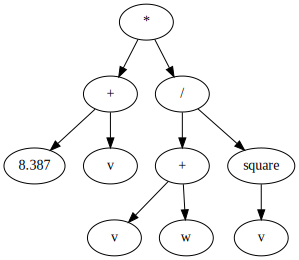

In [35]:
with open("Outputs/article_tests/F2/PSO/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)
    # print(SR.evaluate_tree(tree))
    # print(SR.y)
tree.visualize_tree()